# CS 5824: Semester Project
Application of dynamic action space method from Woo & Sung (2020) to Walker2D (MuJoCo)

## Imports

In [ ]:
!apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb x11-utils

!apt-get install -y \
   libgl1-mesa-dev \
   libgl1-mesa-glx \
   libglew-dev \
   libosmesa6-dev \
   software-properties-common

!apt-get install -y patchelf 

!pip install free-mujoco-py

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [76.4 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [995 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu fo

In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gym
!pip install -U gym[mujoco]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827649 sha256=10026413bda473915006cfcb6c0ba9a2c29c699fe9af38f0a6aeae652761e282
  Stored in directory: /root/.cache/pip/wheels/af/2b/30/5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages t

See: https://mgoulao.github.io/gym-docs/environments/mujoco/walker2d/

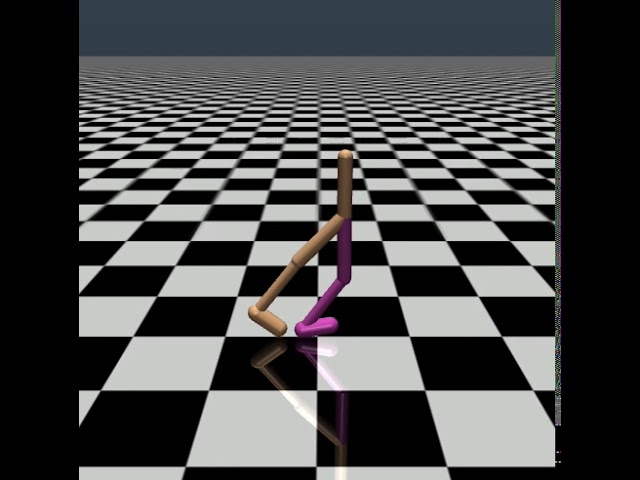

In [ ]:
import gym
import numpy as np
env = gym.make('Walker2d-v2', render_mode='rgb_array')
np.random.seed(42)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Walker2d-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/envs/mujoco/mujoco_env.py:190: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(


In [ ]:
env.action_space

Box(-1.0, 1.0, (6,), float32)

## Config for in-notebook display

In [ ]:
!pip install pyvirtualdisplay
!pip install piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Virtual display of environment
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [24]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder
before_training = "before_training.mp4"

video = VideoRecorder(env, before_training)
# returns an initial observation
env.reset()

video.capture_frame()

for i in range(200):
  env.render()
  video.capture_frame()
  # truncated is for possible OOBs, terminated is for complete MDP
  observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
  ##Not printing this time
  #print("step", i, observation, reward, done, info)

video.close()

Moviepy - Building video before_training.mp4.
Moviepy - Writing video before_training.mp4



Moviepy - Done !
Moviepy - video ready before_training.mp4


In [25]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [26]:
from IPython.display import HTML
html = render_mp4(before_training)
HTML(html)

## Traditional Q-learning policy

In [ ]:
def q_learning_policy(obs):
  pass

In [ ]:
basic_policy = "with_q_learning.mp4"

def get_video_with_q_learning_policy(steps=400):
  video = VideoRecorder(env, basic_policy)
  observation = env.reset()

  for i in range(steps):
    env.render()
    video.capture_frame()
    observation, reward, terminated, truncated, info = env.step(q_learning_policy(observation))

    # Do I need to keep track of a q-dict or something?

    if not (terminated or truncated):
      print("step", i, observation, reward, terminated, truncated, info)

  video.close()

get_video_with_q_learning_policy()
html = render_mp4(basic_policy)
HTML(html)